# Laporan Soal Seleksi Tugas 1 Data Science Academy


## a. Problem Statement

## b. Data Cleaning and Preprocessing

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Melalui link https://tiny.cc/Datacovidjakarta, kami mengambil data set bernama 'Data Jakarta'. isi dari data sheet tersebut adalah banyak orang yang meninggal, sembuh, self isolation, masih perawatan, total pasien, positif harian, positif aktif, sembuh harian, tanpa gejala, bergejala, dan belum ada data mulai dari tanggal 1 Maret 2020 yang selalu update tiap hari hingga sekarang. 

In [4]:
xls = pd.ExcelFile("https://tiny.cc/Datacovidjakarta")
df1 = pd.read_excel(xls, "Data Jakarta", index_col="Tanggal", parse_dates=True)
df1

,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
Tanggal,,,,,,,,,,,,,
2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-28,NaN,NaN,15314,1243032,8375,631,1267352,1250,9006,746,0.0,27.0,8979.0
2022-06-29,NaN,NaN,15314,1243738,8801,633,1268486,1134,9434,706,0.0,27.0,9407.0
2022-06-30,NaN,NaN,15315,1244833,8926,667,1269741,1255,9593,1095,0.0,27.0,9566.0


Dari data diatas yang akan kita ambil adalah data banyaknya orang positif aktif dari tanggal 1 Maret 2020 hingga sekarang. Data tersebut dapat mewakili dari semua data yang nantinya akan dikaitkan dengan data lain untuk dianalisis.

In [5]:
covid_case = df1["Positif Aktif"]
covid_case

Tanggal
2020-03-01       0
2020-03-02       0
2020-03-03       2
2020-03-04       2
2020-03-05       4
              ... 
2022-06-28    9006
2022-06-29    9434
2022-06-30    9593
2022-07-01    9545
2022-07-02    9363
Name: Positif Aktif, Length: 854, dtype: int64

Untuk mendapatkan data bersih yang akan digunakan untuk analisis akan dicek apakah terdapat missing value atau tidak. 

In [6]:
# check missing value
covid_case.isnull().sum()

0

Tidak terdapat missing value pada data pasien covid di Jakarta sehingga tidak memerlukan penanganan.

Selanjutnya melalui link yang sama kami mengambil data set yang bernama 'Daily Vaksinasi Wilayah'. 

In [7]:
df2 = pd.read_excel(xls, "Daily Vaksinasi Wilayah",index_col="Tanggal", parse_dates=True)
df2

,Cakupan Suntik 1,Cakupan Suntik 2,Keterangan,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-06-12,19281.0,1173.0,NaN,2021-06-11 00:00:00,2819926.0,1855812.0,Data cakupan akumulasi 13 January - 11 June 2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-13,198.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,79491.0,3691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,81545.0,3385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,92210.0,3436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dari data yang diatas yang akan kita gunakan adalah cakupan suntik 1 dan cakupan suntik 2 yang nantinya akan diubah menjadi dosis vaksin 1 dan dosis vaksin 2. Untuk pemilihannya sendiri akan digunakan sebagai salah satu variabel dalam kasus perkembangan covid.

In [8]:
covid_vaccine = df2[["Cakupan Suntik 1", "Cakupan Suntik 2"]].rename(columns={"Cakupan Suntik 1": "Vaksin Dosis 1", "Cakupan Suntik 2": "Vaksin Dosis 2"})
covid_vaccine

,Vaksin Dosis 1,Vaksin Dosis 2
Tanggal,,
2021-06-12,19281.0,1173.0
2021-06-13,198.0,29.0
2021-06-14,79491.0,3691.0
2021-06-15,81545.0,3385.0
2021-06-16,92210.0,3436.0
...,...,...
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN


Sebelumnya akan dicek apakah terdapat missing value atau tidak untuk mendapatkan data yang kita mau.

In [9]:
# check missing value
covid_vaccine.isnull().sum()

Vaksin Dosis 1    8727
Vaksin Dosis 2    8727
dtype: int64

Setelah dicek ternyata terdapat missing value pada data sehingga akan ditangani dengan menghapus missing value hingga hanya menyisakan data bersih.

In [10]:
covid_vaccine.dropna(inplace=True)
covid_vaccine

,Vaksin Dosis 1,Vaksin Dosis 2
Tanggal,,
2021-06-12,19281.0,1173.0
2021-06-13,198.0,29.0
2021-06-14,79491.0,3691.0
2021-06-15,81545.0,3385.0
2021-06-16,92210.0,3436.0
...,...,...
2022-06-27,1341.0,811.0
2022-06-28,1118.0,1762.0
2022-06-29,1420.0,940.0


Melalui data yang diperoleh, kami membuat data baru yang berisi total dari banyaknya orang yang telah divaksin mulai dari tanggal 12 Juni 2021 hingga tanggal tersebut. Kami membuat data baru ini untuk mengetahui korelasi antara orang yang positif covid dengan orang yang sudah vaksin akan lebih akurat jika yang digunakan adalah total orang yang sudah divaksin pada hari itu bukan banyak orang divaksin pada hari itu.

In [11]:
# get cumulative vaccine
def cumulative(x):
  return sum(x)

covid_vaccine = covid_vaccine.expanding().apply(cumulative).add_prefix("Total ")

covid_vaccine

,Total Vaksin Dosis 1,Total Vaksin Dosis 2
Tanggal,,
2021-06-12,19281.0,1173.000
2021-06-13,19479.0,1202.000
2021-06-14,98970.0,4893.000
2021-06-15,180515.0,8278.000
2021-06-16,272725.0,11714.000
...,...,...
2022-06-27,8605483.0,8220034.023
2022-06-28,8606601.0,8221796.023
2022-06-29,8608021.0,8222736.023


Selanjutnya, kami mengambil data mobility Indonesia pada tahun 2020 hingga 2022 yang terpisah tiap tahunnya.

In [12]:
df3 = pd.read_csv("2020_ID_Region_Mobility_Report.csv",index_col='date',parse_dates=True)
df3.index.rename('Tanggal', inplace=True)
df3

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,,,
2020-02-15,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-2.0,-2.0,-8.0,1.0,5,1
2020-02-16,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-3.0,-7.0,-4.0,2,2
2020-02-17,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-7.0,-1.0,3,1
2020-02-18,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-2.0,-4.0,1.0,2,1
2020-02-19,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-3.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,4.0,28.0,29.0,-8.0,-2,4
2020-12-28,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2.0,25.0,32.0,-3.0,-30,9
2020-12-29,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,1.0,26.0,32.0,2.0,-30,8


In [13]:
df4 = pd.read_csv("2021_ID_Region_Mobility_Report.csv",index_col='date',parse_dates=True)
df4.index.rename('Tanggal', inplace=True)
df4

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,,,
2021-01-01,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-25,-8,18,-42.0,-66,19
2021-01-02,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-20,3,0,-27.0,-32,11
2021-01-03,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-21,-2,-6,-22.0,-9,9
2021-01-04,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-15,5,-5,-26.0,-24,11
2021-01-05,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,26,54,36,-5.0,-18,3
2021-12-28,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,27,58,45,0.0,-17,1
2021-12-29,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,33,63,56,-2.0,-15,2


In [14]:
df5 = pd.read_csv("2022_ID_Region_Mobility_Report.csv",index_col='date',parse_dates=True)
df5.index.rename('Tanggal', inplace=True)
df5

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,,,
2022-01-01,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,3,24,46,-15.0,-49,6
2022-01-02,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,11,35,28,-4.0,-4,3
2022-01-03,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,14,36,20,-9.0,-10,4
2022-01-04,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,11,33,15,-9.0,-8,4
2022-01-05,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,12,34,17,-10.0,-7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-20,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,39,69,67,15.0,11,17
2022-06-21,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,31,66,57,14.0,9,17
2022-06-22,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,35,67,61,10.0,9,19


Dari data diatas yang akan digunakan adalah mobilitas ditiap tempat yang ada pada data. Data ini akan menjadi variabel kedua yang digunakan untuk menganalisis perkembangan covid.

In [15]:
list_column = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]
new_column = {
    'retail_and_recreation_percent_change_from_baseline': 'Mobilitas Retail dan Rekreasi',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Mobilitas Toko Bahan Makanan dan Apotek',
    'parks_percent_change_from_baseline': 'Mobilitas Taman',
    'transit_stations_percent_change_from_baseline': 'Mobilitas Transportasi Umum',
    'workplaces_percent_change_from_baseline': 'Mobilitas Tempat Kerja',
    'residential_percent_change_from_baseline': 'Mobilitas Permukiman'
}


In [16]:
Jakarta_2020 = df3['sub_region_1'] == 'Jakarta'
mobility_2020 = df3[Jakarta_2020][list_column].rename(columns=new_column)
mobility_2020

,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman
Tanggal,,,,,,
2020-02-15,2.0,3.0,16.0,5.0,6,0
2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
2020-02-18,-1.0,1.0,-3.0,3.0,3,1
2020-02-19,-1.0,-3.0,-2.0,3.0,3,1
...,...,...,...,...,...,...
2020-12-27,-36.0,-17.0,-53.0,-33.0,-11,8
2020-12-28,-28.0,-6.0,-48.0,-40.0,-36,13
2020-12-29,-29.0,-8.0,-49.0,-40.0,-38,14


In [17]:
Jakarta_2021 = df4['sub_region_1'] == 'Jakarta'
mobility_2021 = df4[Jakarta_2021][list_column].rename(columns=new_column)
mobility_2021


,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman
Tanggal,,,,,,
2021-01-01,-46,-27,-51,-61.0,-73,22
2021-01-02,-39,-15,-50,-41.0,-33,11
2021-01-03,-40,-19,-58,-34.0,-15,9
2021-01-04,-29,-5,-50,-39.0,-32,13
2021-01-05,-32,-9,-53,-39.0,-33,14
...,...,...,...,...,...,...
2021-12-27,-5,12,-14,-26.0,-25,8
2021-12-28,-7,10,-16,-25.0,-25,8
2021-12-29,-6,11,-15,-25.0,-25,8


In [18]:
Jakarta_2022 = df5['sub_region_1'] == 'Jakarta'
mobility_2022 = df5[Jakarta_2022][list_column].rename(columns=new_column)
mobility_2022

,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman
Tanggal,,,,,,
2022-01-01,-18,1,-16,-29.0,-50,5
2022-01-02,-7,15,-23,-16.0,-9,2
2022-01-03,-7,18,-17,-23.0,-22,6
2022-01-04,-8,16,-17,-22.0,-20,6
2022-01-05,-9,11,-17,-21.0,-18,6
...,...,...,...,...,...,...
2022-06-20,-13,4,-4,-27.0,-13,8
2022-06-21,-14,1,-4,-27.0,-15,9
2022-06-22,-12,0,3,-24.0,-15,9


Kami membuat data baru dari data mobility tahun 2020, 2021, dan 2022.

In [19]:
list_dataframe = [mobility_2020,mobility_2021,mobility_2022]
mobility = pd.concat(list_dataframe)
mobility

,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman
Tanggal,,,,,,
2020-02-15,2.0,3.0,16.0,5.0,6,0
2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
2020-02-18,-1.0,1.0,-3.0,3.0,3,1
2020-02-19,-1.0,-3.0,-2.0,3.0,3,1
...,...,...,...,...,...,...
2022-06-20,-13.0,4.0,-4.0,-27.0,-13,8
2022-06-21,-14.0,1.0,-4.0,-27.0,-15,9
2022-06-22,-12.0,0.0,3.0,-24.0,-15,9


Untuk mendapatkan data bersih akan dicek missing value dari data yang didapatkan.

In [20]:
# Check missing value
mobility.isnull().sum()

Mobilitas Retail dan Rekreasi              0
Mobilitas Toko Bahan Makanan dan Apotek    0
Mobilitas Taman                            0
Mobilitas Transportasi Umum                0
Mobilitas Tempat Kerja                     0
Mobilitas Permukiman                       0
dtype: int64

Setelah mendapatkan semua data bersih, kami menggabungkan semua data bersih menjadi satu data lengkap.

In [21]:
covid = pd.merge(covid_vaccine, mobility, on="Tanggal", how="right")
covid = pd.merge(covid, covid_case, on="Tanggal", how="inner")
covid.fillna(0, inplace=True)
covid

,Total Vaksin Dosis 1,Total Vaksin Dosis 2,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman,Positif Aktif
Tanggal,,,,,,,,,
2020-03-01,0.0,0.000,4.0,10.0,-11.0,6.0,6,0,0
2020-03-02,0.0,0.000,6.0,24.0,5.0,5.0,6,-1,0
2020-03-03,0.0,0.000,3.0,17.0,-1.0,3.0,5,0,2
2020-03-04,0.0,0.000,-2.0,4.0,-8.0,1.0,4,1,2
2020-03-05,0.0,0.000,3.0,8.0,1.0,4.0,5,0,4
...,...,...,...,...,...,...,...,...,...
2022-06-20,8598820.0,8211624.023,-13.0,4.0,-4.0,-27.0,-13,8,5297
2022-06-21,8600131.0,8212423.023,-14.0,1.0,-4.0,-27.0,-15,9,5915
2022-06-22,8601099.0,8214069.023,-12.0,0.0,3.0,-24.0,-15,9,6779


Selanjutnya kami membuat kolom baru yang berisi persentase perubahan positif aktif dengan selang waktu 6 hari. Selang waktu 6 hari ini kami pilih karena masa inkubasi pasien terkena positif covid adalah 6 hari. Data ini yang akan kita jadikan pertimbangan dengan 2 variabel lainnya.

In [22]:
# Perubahan positive covid setelah masa inkubasi
difference_active_case = covid["Positif Aktif"].shift(-6) - covid["Positif Aktif"].shift(-5)
base_active_case = covid["Positif Aktif"].shift(-5)
covid["Perubahan Positif Aktif (d+6)"] = 100 * difference_active_case / base_active_case
covid.dropna(inplace=True)
covid

,Total Vaksin Dosis 1,Total Vaksin Dosis 2,Mobilitas Retail dan Rekreasi,Mobilitas Toko Bahan Makanan dan Apotek,Mobilitas Taman,Mobilitas Transportasi Umum,Mobilitas Tempat Kerja,Mobilitas Permukiman,Positif Aktif,Perubahan Positif Aktif (d+6)
Tanggal,,,,,,,,,,
2020-03-01,0.0,0.000,4.0,10.0,-11.0,6.0,6,0,0,0.000000
2020-03-02,0.0,0.000,6.0,24.0,5.0,5.0,6,-1,0,0.000000
2020-03-03,0.0,0.000,3.0,17.0,-1.0,3.0,5,0,2,675.000000
2020-03-04,0.0,0.000,-2.0,4.0,-8.0,1.0,4,1,2,0.000000
2020-03-05,0.0,0.000,3.0,8.0,1.0,4.0,5,0,4,6.451613
...,...,...,...,...,...,...,...,...,...,...
2022-06-14,8593064.0,8206292.023,-14.0,2.0,-6.0,-26.0,-13,8,2706,6.365462
2022-06-15,8594205.0,8207295.023,-14.0,0.0,-9.0,-26.0,-13,9,3282,11.666981
2022-06-16,8595395.0,8208374.023,-11.0,3.0,-1.0,-26.0,-13,8,3685,14.606932


## c. Exploratory Data Analysis

<AxesSubplot:xlabel='Tanggal', ylabel='Positif Aktif'>

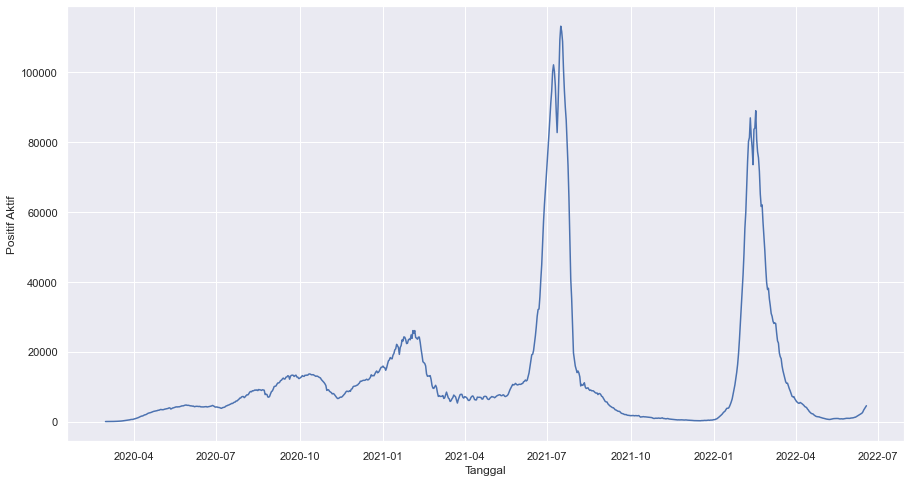

In [23]:
# plot data untuk kasus positif aktif
plt.figure(figsize=(15,8))
sns.lineplot(data=covid["Positif Aktif"])

Grafik diatas menggambarkan perubahan orang yang terkena covid dari awal penyebaran hingga sekarang. Kasus pertama covid di Jakarta terjadi pada tanggal 3 Maret 2020 yang kasusnya kian bertambah terus. Sempat diberlakukan PSBB mulai dari bulan April 2020 dan sempat berhenti pada bulan Juli sebelum akhirnya diberlakukan PSBB perketatan pada bulan Oktober dikarenakan kasus covid kian meningkat. Kasus covid sempat turun dari bulan Oktober hingga November dan kembali naik tinggi hingga mencapai lebih dari 20000 orang yang terkena covid aktif pada Februari 2021. Hal ini berhubungan dengan adanya liburan natal dan tahun baru yang mana banyak dari masyarakat yang berkerumun di tempat wisata. Pada Juni 2021, varian baru covid-19 yaitu varian delta masuk di Indonesia. Varian delta sendiri dikenal lebih berbahaya daripada varian-varian sebelumnya dan lebih mudah menyebar sehingga kasus positif di Jakarta langsung melonjak tajam hingga mencapai lebih dari 100000 orang positif aktif, lima kali lebih banyak dari sebelumnya. Setelahnya gubernur Jakarta memberlakukan PPKM level 4 di seluruh wilayah Jakarta selama satu minggu hingga akhirnya kasus positif aktif turun drastis hingga meneyentuh dibawah 10000. Dari saat itu kasus positif aktif stabil menurun bahkan mencapai dibawah 100 positif aktif pada akhir tahun 2021. Setelah sempat turun drastis, kasus positif aktif di Jakarta kembali naik drastis pada awal tahun 2022 hingga mencapai 80000 orang terkena covid. Hal itu berhubungan dengan masuknya varian baru covid lagi yaitu omicron. Varian 

<AxesSubplot:xlabel='Tanggal', ylabel='Positif Aktif'>

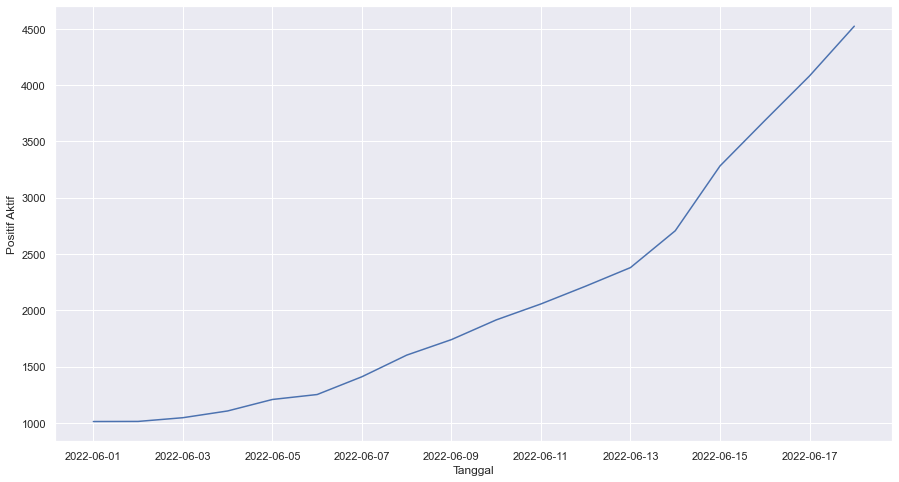

In [34]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=covid["Positif Aktif"].loc['2022-06'])


In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot()

<AxesSubplot:xlabel='Tanggal', ylabel='Perubahan Positif Aktif (d+6)'>

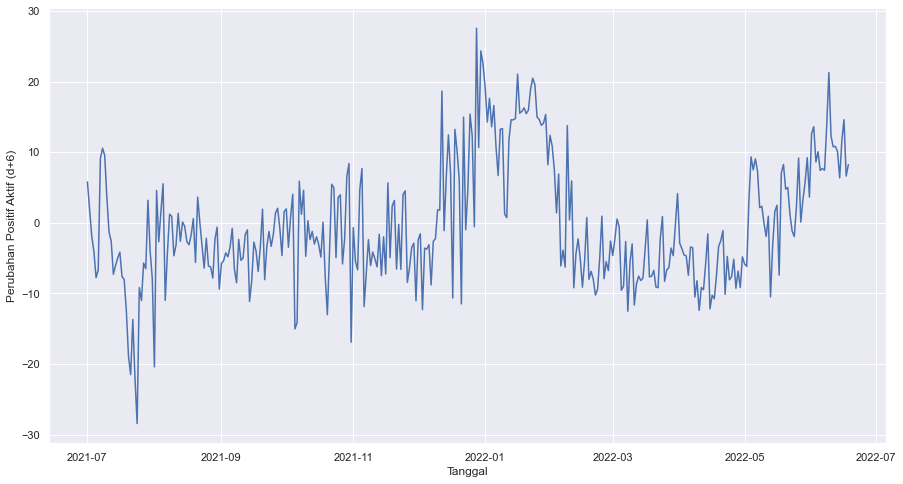

In [24]:
# plot data untuk kasus positif aktif
plt.figure(figsize=(15,8))
sns.lineplot(data=covid.loc["2021-7":,"Perubahan Positif Aktif (d+6)"])

In [41]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2020-03-01 to 2022-06-18
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Total Vaksin Dosis 1                     840 non-null    float64
 1   Total Vaksin Dosis 2                     840 non-null    float64
 2   Mobilitas Retail dan Rekreasi            840 non-null    float64
 3   Mobilitas Toko Bahan Makanan dan Apotek  840 non-null    float64
 4   Mobilitas Taman                          840 non-null    float64
 5   Mobilitas Transportasi Umum              840 non-null    float64
 6   Mobilitas Tempat Kerja                   840 non-null    int64  
 7   Mobilitas Permukiman                     840 non-null    int64  
 8   Positif Aktif                            840 non-null    int64  
 9   Perubahan Positif Aktif (d+6)            840 non-null    float64
dtypes: float64(7), int64(3)
memory 

<AxesSubplot:xlabel='Tanggal'>

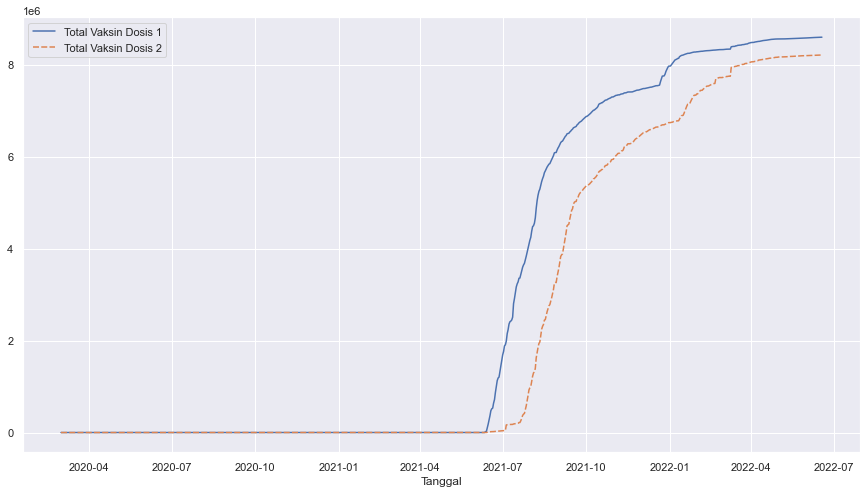

In [25]:
# plot data untuk total vaksin
plt.figure(figsize=(15,8))
sns.lineplot(data=covid[["Total Vaksin Dosis 1", "Total Vaksin Dosis 2"]])

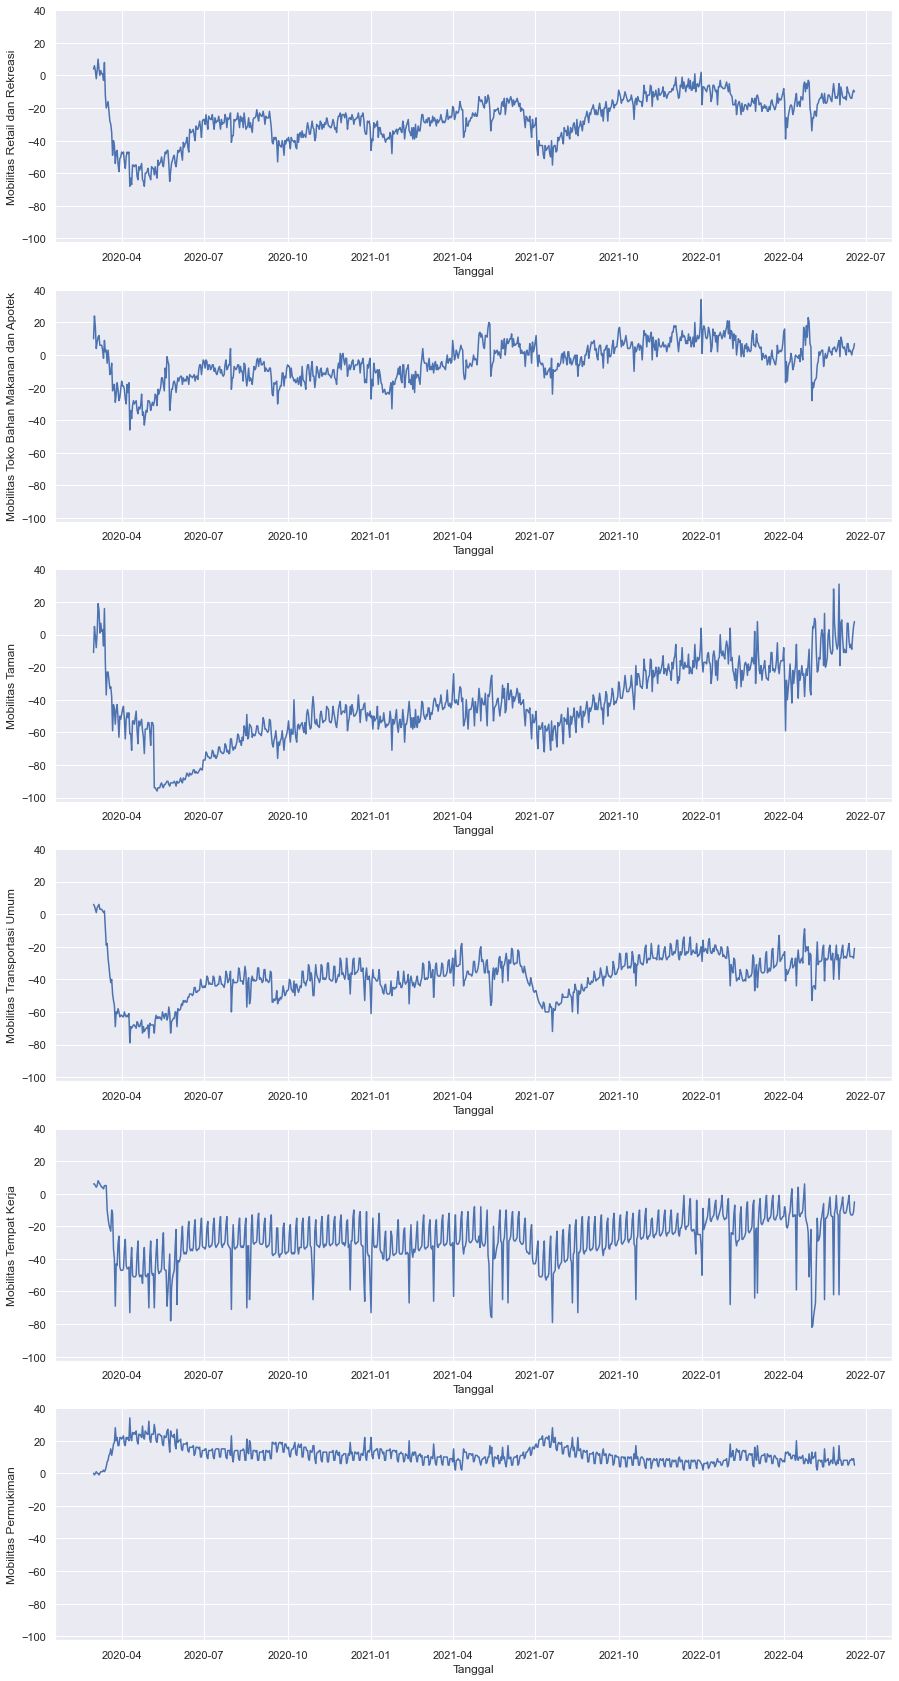

In [26]:
# plot data untuk mobilitas
fig, axes = plt.subplots(nrows=6, figsize=(15,30), sharey=True)

i = 0
for col in covid.columns:
  # jika col merupakan kolom mobilitas
  if col.startswith("Mobilitas"):
    sns.lineplot(ax=axes[i], data=covid[col])
    i+=1

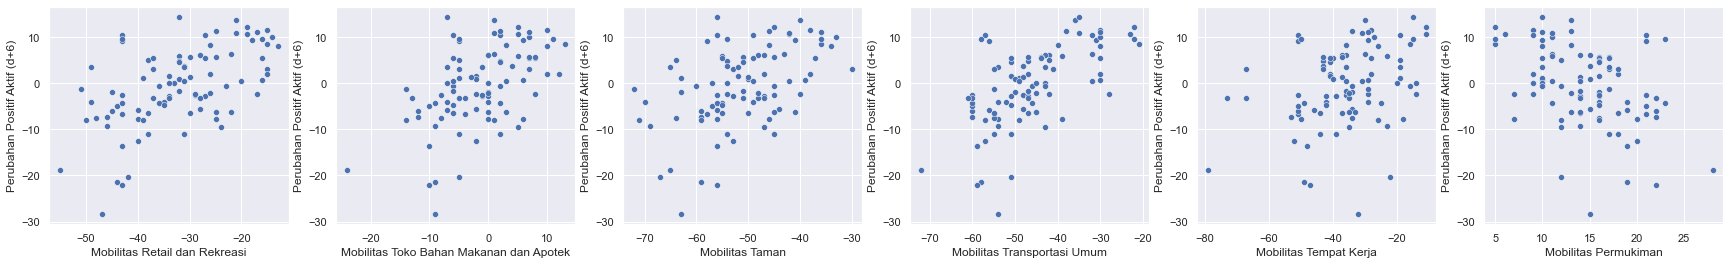

In [37]:
# plot data untuk mobilitas
fig, axes = plt.subplots(ncols=6, figsize=(30,4))

i = 0
for col in covid.columns:
  # jika col merupakan kolom mobilitas
  if col.startswith("Mobilitas"):
    sns.scatterplot(ax=axes[i], data=covid.loc['2021-6':'2021-8'],x=col, y="Perubahan Positif Aktif (d+6)")
    i+=1

## d. Modelling

In [28]:
# import the library
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

Untuk keperluan modelling, akan diambil dataset covid mulai awal tahun 2022 saja. Hal ini bertujuan agar machine learning mempelajari data yang terbaru dan tidak terganggu dengan variabel-variabel lain yang mungkin memengaruhi persebaran covid tetapi tidak dimasukkan dikarenakan terbatasnya variabel yang ditentukan dalam soal seperti tingkat mutasi virus corona, contohnya yaitu terjadinya kemunculan varian baru yang secara tiba-tiba dan menyebar secara cepat seperti delta atau omicron. Dalam modelling kami, Feature yang akan digunakan terdiri dari 8 variable yaitu Total Vaksin Dosis 1, Total Vaksin Dosis 2, Mobilitas Retail dan Rekreasi, Mobilitas Toko Bahan Makanan dan Apotek, Mobilitas Taman, Mobilitas Transportasi Umum, Mobilitas Tempat Kerja, dan Mobilitas Permukiman. Sementara itu label yang akan diprediksi adalah Perubahan Positif Aktif (d+6)

In [ ]:
covid_ = covid["2022":]
X = covid_.iloc[:, :8].values
y = covid_.iloc[:, -1].values

Sebelum mengonstruksi model, akan dibuat fungsi validasi terlebih dahulu menggunakan metrik r2 score

In [ ]:
#Validation function
n_folds = 4

def model_validation(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    return cross_val_score(model, X, y, cv=kf)

Sekarang akan dikonstruksikan 7 model berbeda yaitu Decision Tree Regression, Random Forest Regression, Support Vector Regression, Lasso Regression, Elastic Net Regression, Gradient Boosting Regression, dan XGBoost.

In [ ]:
# Decision Tree Regression
dtr = DecisionTreeRegressor(max_depth=3)

# Random Forest Regression
rfr = RandomForestRegressor(
    max_depth=5,
    n_estimators=10,
    random_state=0,
)

# Support Vector Regression
svr = make_pipeline(RobustScaler(), SVR(C=10000, gamma=0.0001, kernel="rbf"))

# LASSO Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

# Elastic Net Regression
enet = make_pipeline(
    RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3)
)

# Gradient Boosting Regression
gboost = GradientBoostingRegressor(
    n_estimators=10,
    learning_rate=0.05,
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=15,
    min_samples_split=10,
    loss="huber",
    random_state=5,
)

# XGBoost
model_xgb = xgb.XGBRegressor(
    colsample_bytree=0.4603,
    gamma=0.0468,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1.7817,
    n_estimators=10,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    subsample=0.5213,
    random_state=7,
    nthread=-1,
)

Cek score masing-masing model

In [ ]:
score = model_validation(dtr)
print("DecisionTree score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(rfr)
print("RandomForest score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(svr)
print("SupportVector score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(lasso)
print("Lasso score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(enet)
print("ElasticNet score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(gboost)
print("GBoost score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = model_validation(model_xgb)
print("XGboost score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

## e. Conclusion

## f. Daftar Pustaka